In [33]:
#Installing libraries

# !pip3 install split-folders
# !pip3 install keras-efficientnet
# !pip3 install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 861.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 7.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 4.6 MB/s eta 0:00:00ta 0:00:01


In [31]:
# Importing libraries
import pandas as pd
import numpy as np

import os
import shutil 

# import cv2
# from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [3]:
train_csv = pd.read_csv("./train/train.csv")
test_csv =  pd.read_csv("./test/test.csv")

labels = {1:'crack',2:'scratch',3:'tire flat',4 :'dent', 5: 'glass shatter', 6: 'lamp broken'}

In [5]:
# Checking number of records
print(f"{train_csv.shape=}")
print(f"{test_csv.shape=}")

train_csv.shape=(7200, 3)
test_csv.shape=(4800, 2)


In [6]:
# Lets have a look at csv file
train_csv.head()

image_id filename  label
0         1    1.jpg      2
1         2    2.jpg      4
2         3    3.jpg      2
3         4    4.jpg      3
4         5    5.jpg      5

In [7]:
train_csv.dtypes

image_id     int64
filename    object
label        int64
dtype: object

In [8]:
# Let us see number of data points for each labels
train_csv['label'].value_counts()


label
2    2349
4    2079
5    1185
6     882
3     534
1     171
Name: count, dtype: int64

In [9]:
# Define image folder path
path_to_train_images = "./train/images/"
path_to_test_images = "./test/images/"

# Listing all images
train_image_files = os.listdir(path_to_train_images)
test_image_files = os.listdir(path_to_test_images)

In [10]:
print(f"{train_image_files=}")

train_image_files=['63.jpg', '6400.jpg', '823.jpg', '4217.jpg', '3578.jpg', '2666.jpg', '5109.jpg', '2100.jpg', '4571.jpg', '7078.jpg', '1409.jpg', '6366.jpg', '189.jpg', '6372.jpg', '2114.jpg', '4565.jpg', '4203.jpg', '2672.jpg', '6414.jpg', '77.jpg', '837.jpg', '2882.jpg', '3544.jpg', '5135.jpg', '1353.jpg', '7044.jpg', '1435.jpg', '5653.jpg', '3222.jpg', '5647.jpg', '2128.jpg', '3236.jpg', '4559.jpg', '7050.jpg', '1421.jpg', '6428.jpg', '1347.jpg', '2896.jpg', '3550.jpg', '5121.jpg', '638.jpg', '5874.jpg', '5860.jpg', '2869.jpg', '1390.jpg', '604.jpg', '2699.jpg', '2841.jpg', '3587.jpg', '5848.jpg', '5690.jpg', '162.jpg', '6399.jpg', '7087.jpg', '176.jpg', '7093.jpg', '5684.jpg', '2855.jpg', '3593.jpg', '88.jpg', '610.jpg', '1384.jpg', '6164.jpg', '4773.jpg', '2302.jpg', '2464.jpg', '4015.jpg', '6602.jpg', '1179.jpg', '6616.jpg', '2470.jpg', '4001.jpg', '4767.jpg', '3008.jpg', '2316.jpg', '5479.jpg', '6170.jpg', '3020.jpg', '4997.jpg', '5451.jpg', '6158.jpg', '1637.jpg', '1151.jpg',

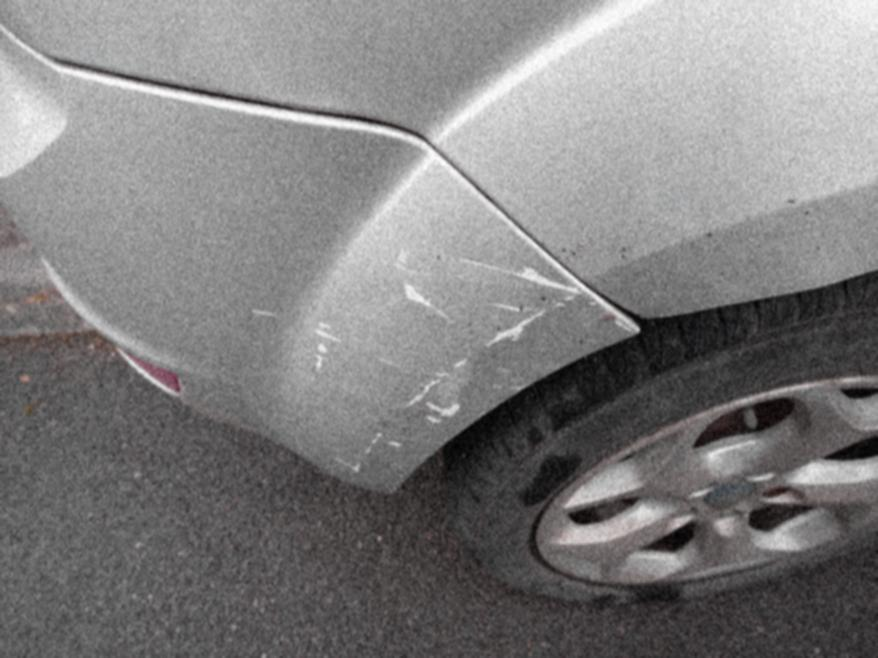

/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_3903/4062531334.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Labels : ' , f"{labels[int(train_csv.loc[train_csv['filename'] == image_file]['label'])]}")


Labels :  scratch


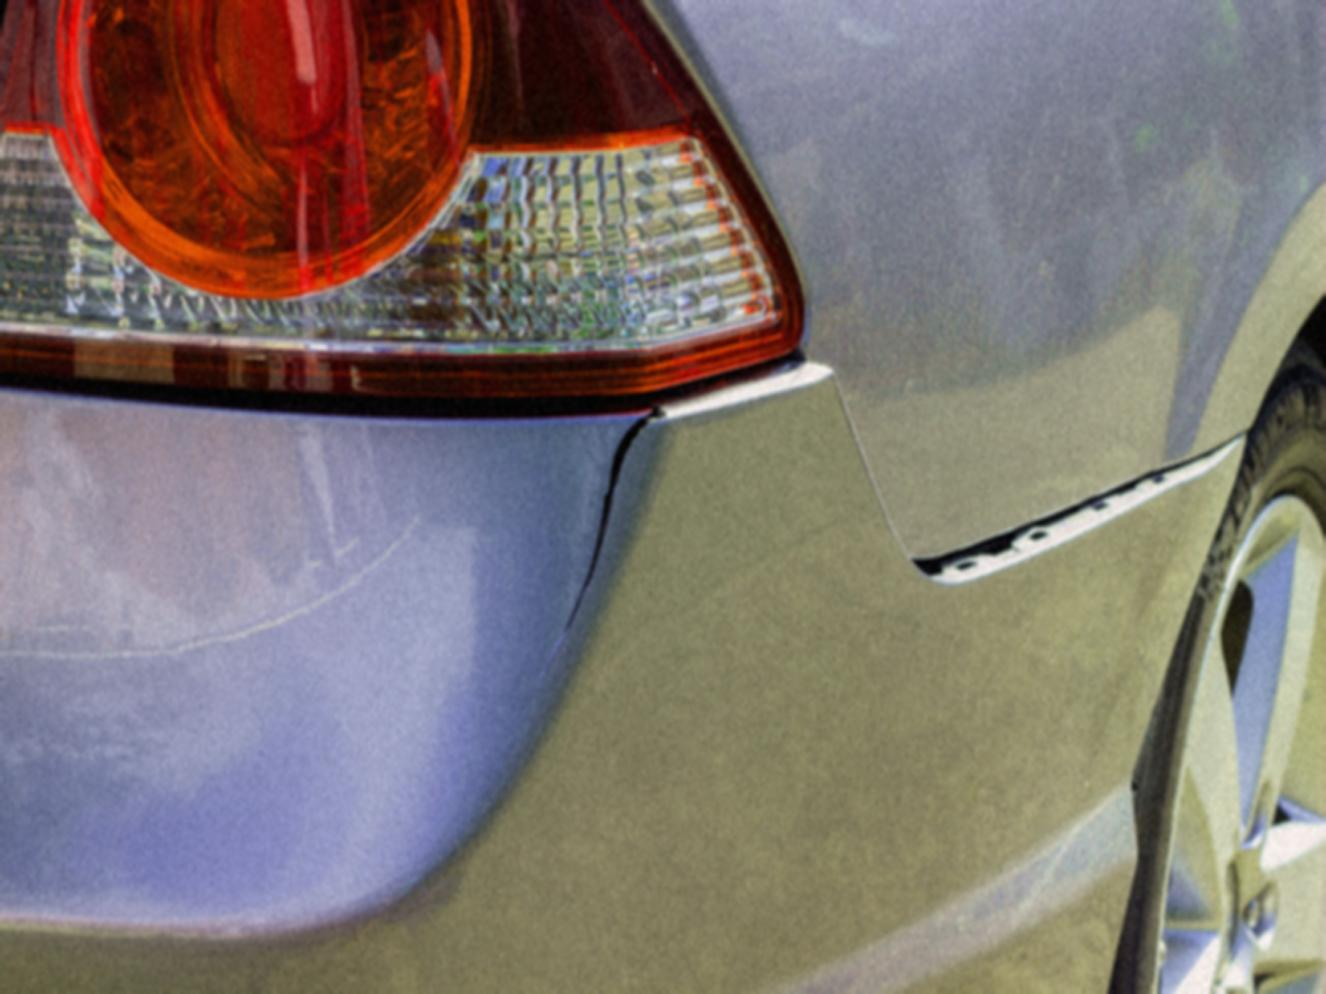

Labels :  crack


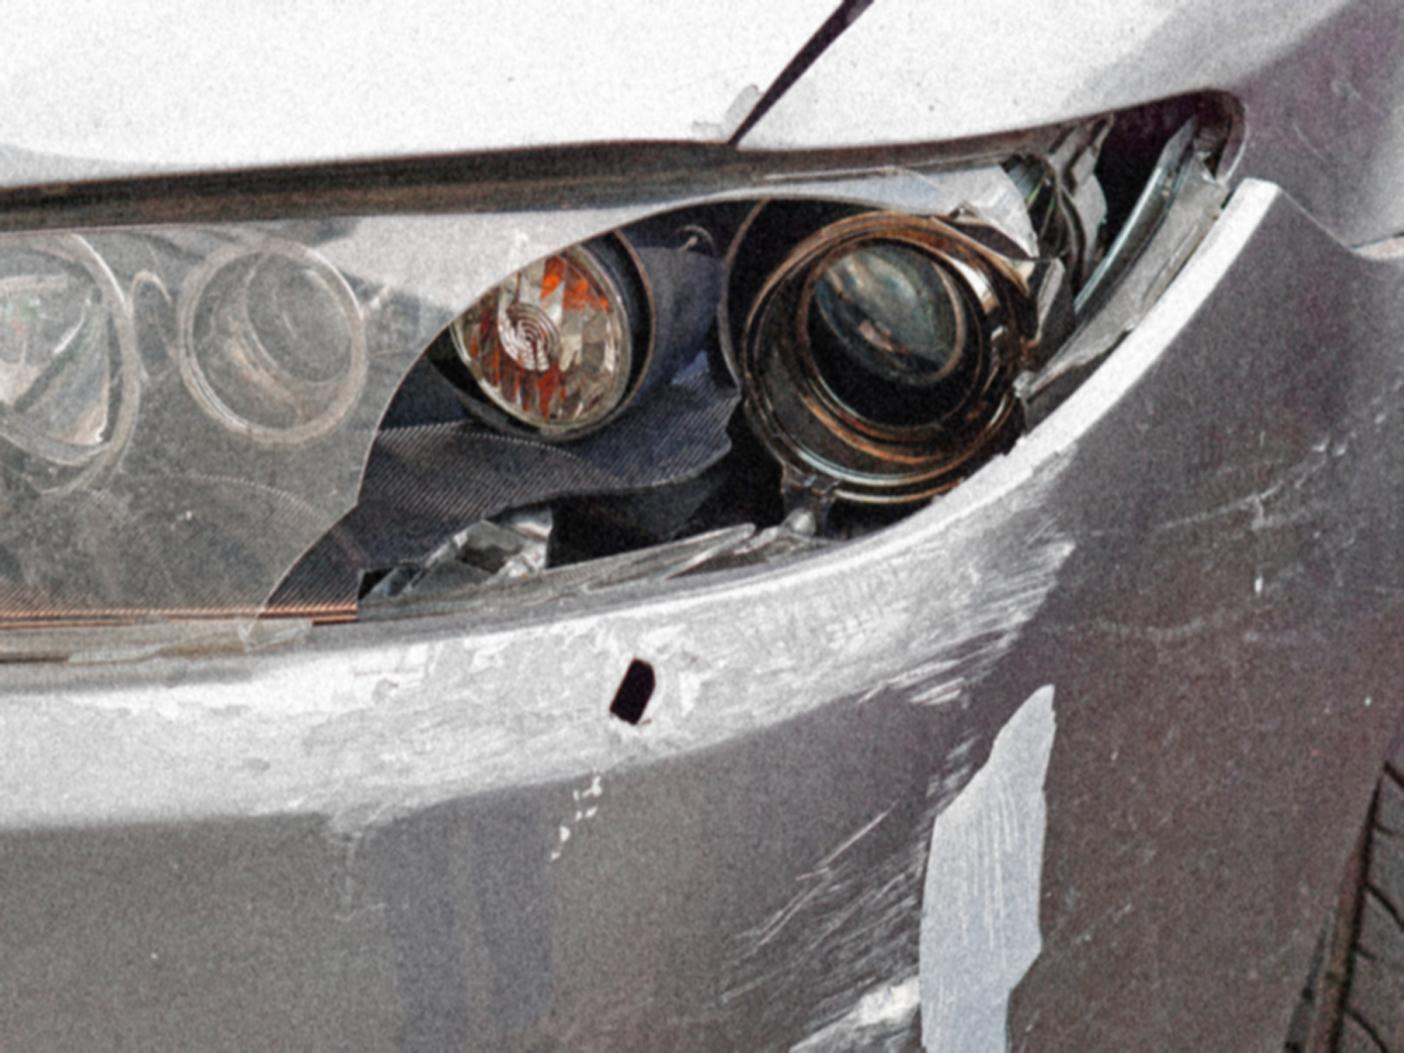

Labels :  lamp broken


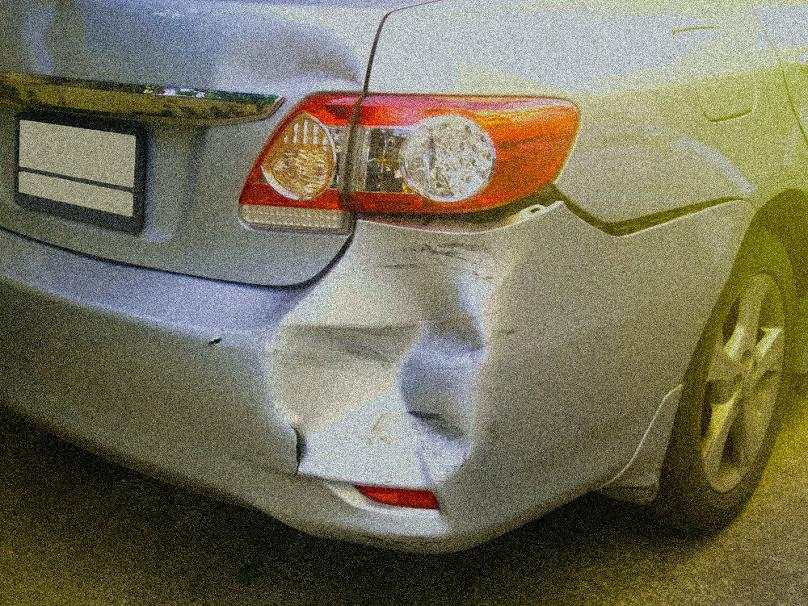

Labels :  dent


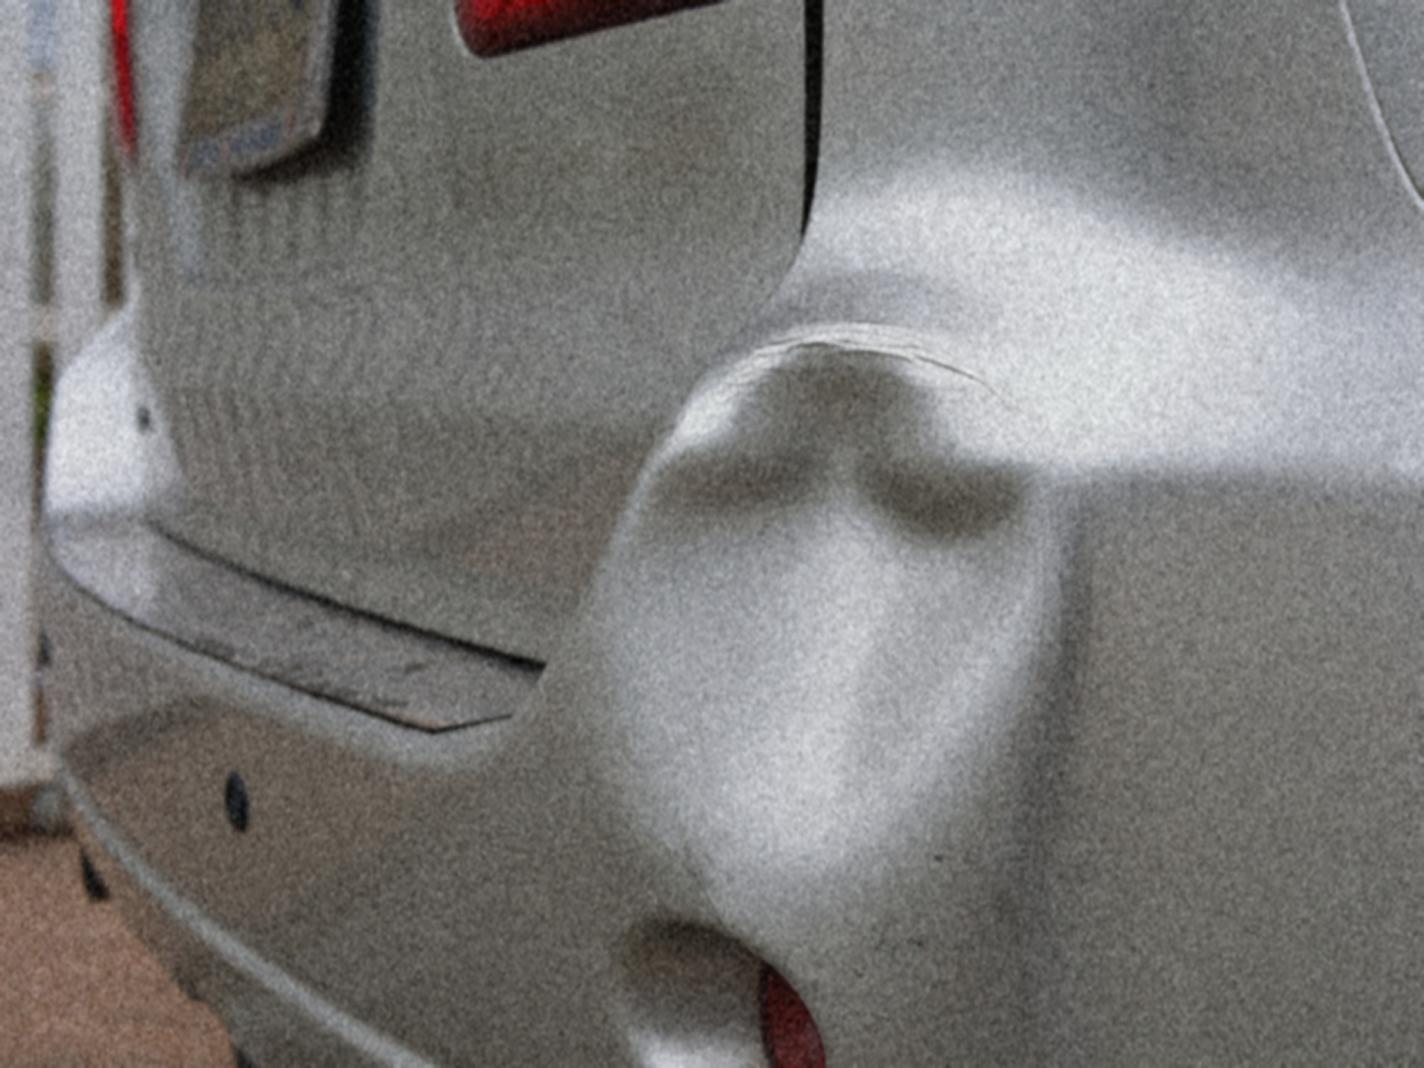

Labels :  dent


In [11]:

# Check some images of train

for i,image_file in enumerate(train_image_files):
    if image_file.endswith(".jpg") or image_file.endswith(".png"):
        if i < 5:
            image = Image.open(path_to_train_images + image_file)
            display(image)
            
            print('Labels : ' , f"{labels[int(train_csv.loc[train_csv['filename'] == image_file]['label'])]}")

        else:
            break

In [12]:
# Let us find the maximum height and maximum weight in all images
train_max_width = -float('inf')
train_max_height = -float('inf')

train_min_width = float('inf')
train_min_height = float('inf')


for image_file in train_image_files:
    if image_file.endswith(".jpg") or image_file.endswith(".png"):
        image = Image.open(path_to_train_images + image_file)
        
        width, height = image.size
        
        train_max_height = max(height,train_max_height)
        train_max_width = max(width,train_max_width)

        train_min_width = min(height,train_max_height)
        train_min_height = min(height,train_max_height)

print(f"{train_max_height=}")

print(f"{train_max_width=}")        

print(f"{train_min_height=}")

print(f"{train_min_width=}")        

train_max_height=1125
train_max_width=1500
train_min_height=651
train_min_width=651


In [17]:
folder = './dataset/train'

#making folder for each classes
for values in labels:
    path = os.path.join(folder,str(values))
    os.makedirs(path,exist_ok=True)

# coping our raw data to each classes

for image in train_image_files:
    label = int((train_csv[train_csv['filename'] == image]['label']).iloc[0])
  #  path = os.path.join(folder,label,'/')
    from_path = os.path.join(path_to_train_images,image)
    to_path = os.path.join(folder,str(label))
    if not os.path.exists(os.path.join(to_path,image)):
      shutil.copy(from_path,to_path)
  

In [26]:

import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("./dataset/train", output="./dataset_final",
    seed=1337, ratio=(.8, .2, ), group_prefix=None, move=True) # default values



































































Copying files: 7200 files [00:08, 865.01 files/s]


In [58]:
from tensorflow.keras.applications import EfficientNetB0

In [40]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [73]:
# Add our data-augmentation parameters to ImageDataGenerator

train_dir = './dataset_final/train'
validation_dir = './dataset_final/val'
test_dir = './test'

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = valid_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

test_generator = test_datagen.flow_from_directory( test_dir, batch_size = 20, class_mode = None, target_size = (224, 224))

Found 5758 images belonging to 6 classes.
Found 1442 images belonging to 6 classes.
Found 4800 images belonging to 1 classes.


In [ ]:
from tensorflow.keras import backend as K

def macro_f1(y_true, y_pred):
    """
    Compute macro F1 score as a Keras metric.
    """
    # Convert predictions to binary values (0 or 1)
    y_pred_binary = K.round(y_pred)

    # Compute precision and recall for each class
    true_positives = K.sum(K.round(y_true * y_pred_binary), axis=0)
    false_positives = K.sum(K.round(K.clip(y_pred_binary - y_true, 0, 1)), axis=0)
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred_binary, 0, 1)), axis=0)

    # Compute precision and recall
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())

    # Compute F1 score for each class
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

    # Average F1 scores across all classes
    macro_f1 = K.mean(f1)

    return macro_f1

In [66]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the EfficientNetB0 model with pre-trained weights
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Flatten the output
x = Flatten()(base_model.output)

# Add additional layers on top of the flattened output
x = Dense(1028, activation='relu')(x)

# Output layer
output = Dense(6, activation='softmax')(x)

# Create the full model
full_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',macro_f1])


In [67]:
eff_history = full_model.fit_generator(train_generator, validation_data = validation_generator,  epochs = 10)


/var/folders/qj/rbyl_gdj7xn3ycgcxjpvn5080000gn/T/ipykernel_3903/1849217573.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  eff_history = full_model.fit_generator(train_generator, validation_data = validation_generator,  epochs = 10)


Epoch 1/10
  8/288 [..............................] - ETA: 15:19 - loss: 58.1373 - accuracy: 0.1813 - macro_f1: 0.0526   

KeyboardInterrupt: 

In [83]:
test_dir = './test_sample/'
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_generator = test_datagen.flow_from_directory( test_dir, batch_size = 20, class_mode = None, target_size = (224, 224))

test_generator.reset()
# Make predictions using the model and the test generator
predictions = full_model.predict(test_generator)

predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

print(predictions)

Found 2 images belonging to 1 classes.
1/1 [==============================] - 0s 302ms/step
['2', '2']


In [91]:
# Preparing submitssion file

filenames=test_generator.filenames
filenames = [f[7:] for f in filenames]
results=pd.DataFrame({"image_id":filenames,
                      "label":predictions})
results.to_csv("sub.csv",index=False)


In [92]:
(train_generator.class_indices)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5}

In [87]:
filenames[6:]

'121'

In [93]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 3, 4]
y_pred = [1, 0, 2, 3, 4]

macro_f1 = f1_score(y_true, y_pred, average='macro')

print(macro_f1)

0.6


In [94]:
"""Demonstrate batch data access using a custom metric."""
import tensorflow as tf
from tensorflow import keras
class DataCallback(keras.callbacks.Callback):  # diff
    """Callback to operate on batch data from metric."""
    def __init__(self):
        """Offer a metric to access batch data."""
        super().__init__()
        self.y_true = None
        self.y_pred = None
    def set_model(self, model):
        """Initialize variables when model is set."""
        self.y_true = tf_nan(model.output.dtype)
        self.y_pred = tf_nan(model.output.dtype)
    def metric(self, y_true, y_pred):
        """Fake metric."""
        self.y_true.assign(y_true)
        self.y_pred.assign(y_pred)
        return 0
    def on_train_batch_end(self, _batch, _logs=None):
        """See keras.callbacks.Callback.on_train_batch_end."""
        print("y_true =", self.y_true.numpy())
        print("y_pred =", self.y_pred.numpy())
    def on_train_end(self, _logs=None):
        """Clean up."""
        del self.y_true, self.y_pred
def tf_nan(dtype):
    """Create NaN variable of proper dtype and variable shape for assign()."""
    return tf.Variable(float("nan"), dtype=dtype, shape=tf.TensorShape(None))
def main():
    """Run main."""
    model = keras.Sequential([keras.layers.Dense(1, input_shape=(2,))])
    callback = DataCallback()
    model.compile(loss="mse", optimizer="adam", metrics=[callback.metric])  # diff
    model.fit(
        x=tf.transpose(tf.range(7.0) + [[0.2], [0.4]]),
        y=tf.transpose(tf.range(7.0) + 10 + [[0.5]]),
        validation_data=(
            tf.transpose(tf.range(11.0) + 30 + [[0.6], [0.7]]),
            tf.transpose(tf.range(11.0) + 40 + [[0.9]]),
        ),
        shuffle=False,
        batch_size=3,
        epochs=2,
        verbose=0,
        callbacks=[callback],
    )
    model.save("tmp.tf")
if __name__ == "__main__":
    main()

y_true = [[10.5]
 [11.5]
 [12.5]]
y_pred = [[-0.1599714]
 [-0.9176426]
 [-1.6753136]]
y_true = [[13.5]
 [14.5]
 [15.5]]
y_pred = [[-2.425385 ]
 [-3.1810558]
 [-3.936727 ]]
y_true = [[16.5]]
y_pred = [[-4.6804094]]
y_true = [[10.5]
 [11.5]
 [12.5]]
y_pred = [[-0.15532035]
 [-0.90745974]
 [-1.6595992 ]]
y_true = [[13.5]
 [14.5]
 [15.5]]
y_pred = [[-2.4055374]
 [-3.1560931]
 [-3.906649 ]]
y_true = [[16.5]]
y_pred = [[-4.645616]]
INFO:tensorflow:Assets written to: tmp.tf/assets


INFO:tensorflow:Assets written to: tmp.tf/assets


In [110]:
def create_one_hot_array(y_pred):
    # Get the indices of the maximum values along each row
    max_indices = np.argmax(y_pred, axis=1)
    
    # Create a new array with zeros
    one_hot_array = np.zeros_like(y_pred)
    
    # Set 1 at the maximum value indices
    one_hot_array[np.arange(len(y_pred)), max_indices] = 1
    
    return one_hot_array

# Example usage:
y_one_hot = create_one_hot_array(y_pred)
print(y_one_hot)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [108]:
y_pred = np.array([[0.17945623, 0.2468156 , 0.08339567, 0.16823272, 0.19688304, 0.12521672],[0.1446152 , 0.24317433, 0.07497379, 0.09232755, 0.25266218, 0.19224697],[0.18066815, 0.24496053 ,0.08354706 ,0.16733748 ,0.19826809, 0.12521869]])


In [107]:
np.array([[1,2,3],[1,23,4]])

array([[ 1,  2,  3],
       [ 1, 23,  4]])

In [112]:
y_pred.shape

(3, 6)

In [1]:
from pynput.mouse import Button, Controller
import time

mouse = Controller()

while True:
    mouse.click(Button.left, 1)
    time.sleep(30)

ModuleNotFoundError: No module named 'pynput'

In [2]:
!pip3 install pynput

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 649.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.6/738.6 kB 793.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.2/391.2 kB 873.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pyobjc-core
    Found existing installation: pyobjc-core 9.0
    Uninstalling pyobjc-core-9.0:
      Successfully uninstalled pyobjc-core-9.0
  Attempting uninstall: pyobjc-framework-Cocoa
    Found existing installation: pyobjc-framework-Cocoa 9.0
    Uninstalling pyobjc-framework-Cocoa-9.0:
      Successfully uninstalled pyobjc-framework-Cocoa-9.0


In [2]:
from sklearn.metrics import confusion_matrix

# Create the actual labels
actual_labels = [1, 0, 1, 0, 1,2]

# Create the predicted labels
predicted_labels = [1, 1, 0, 1, 0,3]

# Generate the confusion matrix
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print(confusion_matrix)

[[0 2 0 0]
 [2 1 0 0]
 [0 0 0 1]
 [0 0 0 0]]


In [1]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO

In [ ]:
yolo predict model=yolov8s.pt source="test_sample/images/229.jpg"